# Introduction

## 0. Datasets, Features
To start off the tutorial, let us see examine a dataset.

Most datasets can be separated using some of their features. Let us see how the Boston housing prices change with respect to different features. The prediction target is median prices in $1000. For the explanation what every feature represents, visit the [UCI repository](http://archive.ics.uci.edu/ml/datasets/Housing).

Populating the interactive namespace from numpy and matplotlib


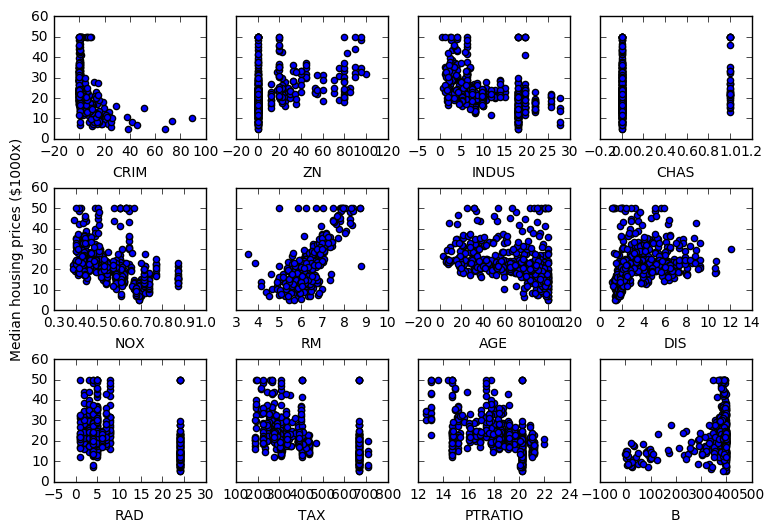

In [1]:
%pylab --no-import-all inline
from sklearn.datasets import load_boston
dataset = load_boston()
X, y = dataset['data'], dataset['target']
feat_labels = dataset['feature_names']

feat_size = feat_labels.shape[0]
rows,cols = 3,4

f, ax = pylab.subplots(rows, cols, sharey=True, figsize=(9,6), dpi=80)
for idx in range(rows*cols):
    ax[idx / cols, idx%cols].scatter(X[:,idx], y)
    ax[idx / cols, idx%cols].set_xlabel(feat_labels[idx])

# ax[0,1].set_title('Median housing prices ($1000x)')
ax[1,0].set_ylabel('Median housing prices ($1000x)')
f.subplots_adjust(wspace=None, hspace=.4)

########################################
## Uncomment to see 3D scatter plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# feat1 = 0
# feat2 = 5
# xs = X[:,feat1]
# ys = X[:,feat2]
# zs = y
# ax.scatter(xs, ys, zs, c='r', marker='^')
# ax.set_xlabel(feat_labels[feat1])
# ax.set_ylabel(feat_labels[feat2])
# ax.set_zlabel('Median housing prices ($1000x)')

Notice how the housing prices (`y-axis`) changes with respect to different features (`x-axis`). It looks like there is some pattern, but it is difficult to tell exactly what the relationship is. 

## 1. Linear Regression

The easiest model or a pattern that we can use for the given dataset is `Linear Regression` which is a simple straight line that tries to fit all the given data points. Which brings us to the first tool to use for Machine Learning - `scikit-learn` library.

Follow the code below to see how to create a linear model

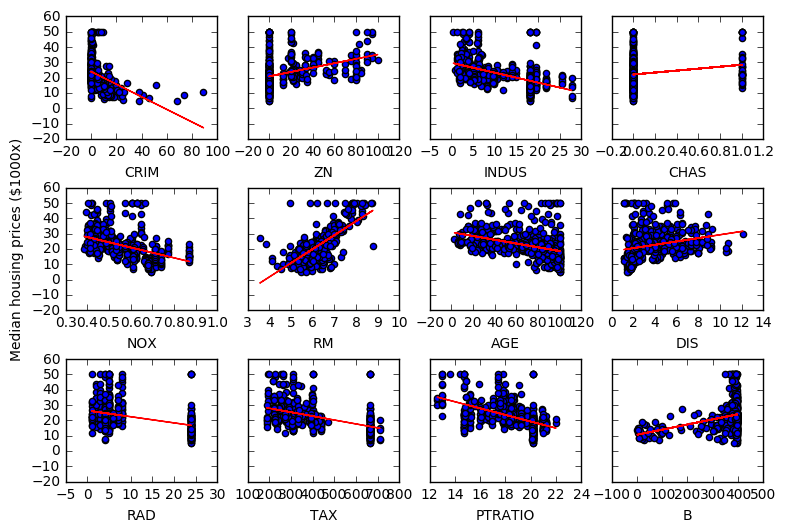

In [3]:
from sklearn.linear_model import LinearRegression

## Create a linear model
lin = LinearRegression() ## To fit individual features

## Train using ALL features
# lin_all = LinearRegression(normalize=True) ## To fit all features
# lin_all.fit(X, y)

f, ax = pylab.subplots(rows, cols, sharey=True, figsize=(9,6), dpi=80)
for idx in range(rows*cols):
    ## We will train per feature for demonstration purposes
    X_hat = X[:, idx].reshape((len(X), 1))
    lin.fit(X_hat, y)
    ax[idx / cols, idx%cols].scatter(X_hat, y)
    ax[idx / cols, idx%cols].plot(X_hat, lin.predict(X_hat), '-r')
    ax[idx / cols, idx%cols].set_xlabel(feat_labels[idx])
    ## As a comparison, add the results of ALL feature training:
    # ax[idx / cols, idx%cols].plot(X[:, idx], np.dot(X[:, idx], lin_all.coef_[idx])+lin.intercept_, '-g')

# ax[0,1].set_title('Median housing prices ($1000x)')
ax[1,0].set_ylabel('Median housing prices ($1000x)')
f.subplots_adjust(wspace=None, hspace=.4)